In [150]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  
from astropy.utils import data
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp
import matplotlib.patches as patches
from astropy.coordinates import SkyCoord
import Annas_functions as func
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

In [ ]:
data = fits.open(r'fits file.fits')  # Open the FITS file for reading

world_coord_A = SkyCoord('16h32m22.87', '-24d28m36.5s', frame='icrs')
world_coord_B = SkyCoord('16h32m22.85', '-24d28m32.97s', frame='icrs')
world_coord_E = SkyCoord('16h32m28.84', '-24d28m57s', frame='icrs')

In [ ]:
species = 'CH3OH 2(-1,1)-1(-1,0)E' #Example of the species targeted in the file
rest_freq = 96.755501

fmin = 96.752
fmax = 96.755
moment_0 = func.moment_maps(data, rest_freq, fmin, fmax, 0, 100, 0)
moment_1 = func.moment_maps(data, rest_freq, fmin, fmax, 0, 100, 1)
moment_2 = func.moment_maps(data, rest_freq, fmin, fmax, 0, 70, 2)
# linewidth_map = func.linewidth_map(data, rest_freq, 0, 70)
# column_density_map = func.column_density_map(data, rest_freq, 0, 70)

# Moment 0 plot

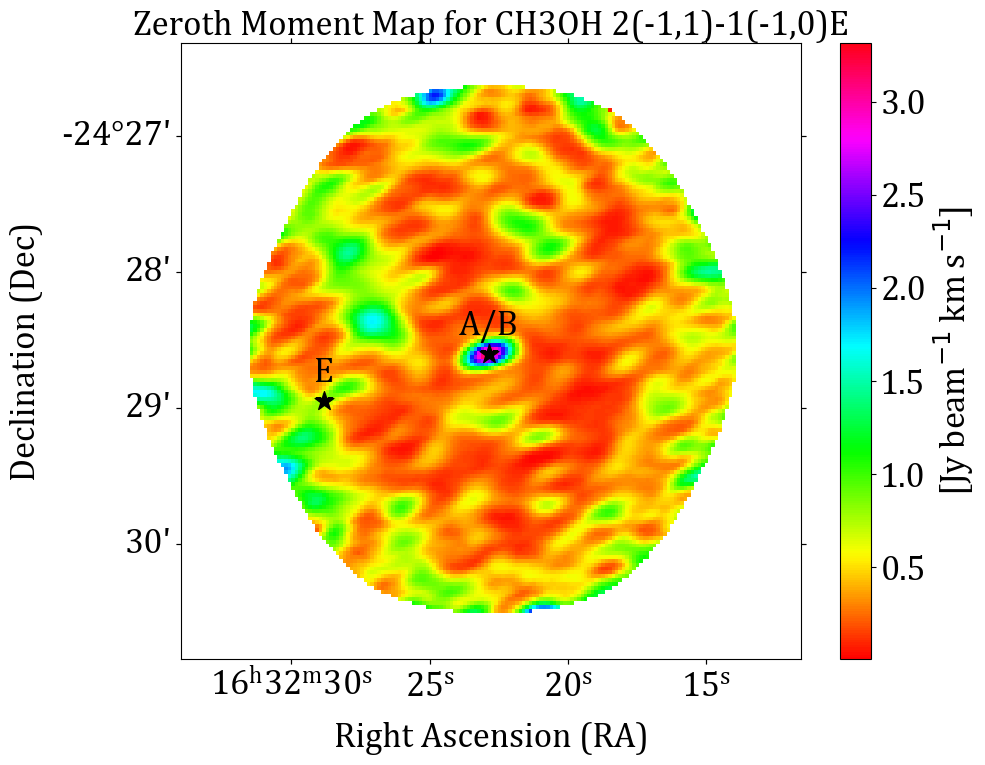

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Cambria'
plt.rcParams['font.size'] = 12

wcs = WCS(data[0].header, naxis=2)
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)

im = ax.imshow(moment_0.value, cmap='hsv', origin='lower', aspect='auto')
# ax.invert_yaxis()  # Uncomment this line if you need to invert the y-axis

ax.set_title(f'Zeroth Moment Map for {species}',  fontsize=25)
ax.set_xlabel('Right Ascension (RA)',  fontsize=25)
ax.set_ylabel('Declination (Dec)',  fontsize=25)

ax.tick_params(axis='both', labelsize=25)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))  # Adjust the number of minor ticks as needed
ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # Adjust the number of minor ticks as needed

pixel_coord_A = world_coord_A.to_pixel(wcs)
pixel_coord_B = world_coord_B.to_pixel(wcs)
pixel_coord_E = world_coord_E.to_pixel(wcs)

ax.scatter(pixel_coord_A[0], pixel_coord_A[1], color='black', s=200, marker='*')
ax.scatter(pixel_coord_E[0], pixel_coord_E[1], color='black', s=200, marker='*')

ax.text(pixel_coord_A[0], pixel_coord_A[1] + 5, 'A/B', color='black', fontsize=25, ha='center')
ax.text(pixel_coord_E[0], pixel_coord_E[1] + 5, 'E', color='black', fontsize=25, ha='center')

cbar_im = plt.colorbar(im, ax=ax) 
cbar_im.ax.tick_params(labelsize=25)  # Change to desired font size
cbar_im.set_label('[Jy beam$^{-1}$ km s$^{-1}$]', size=25)
# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\moment maps\mm0\final_two_mm0_ch3oh 2(-1,1)-1(-1,0)E.pdf", bbox_inches='tight', dpi=300)

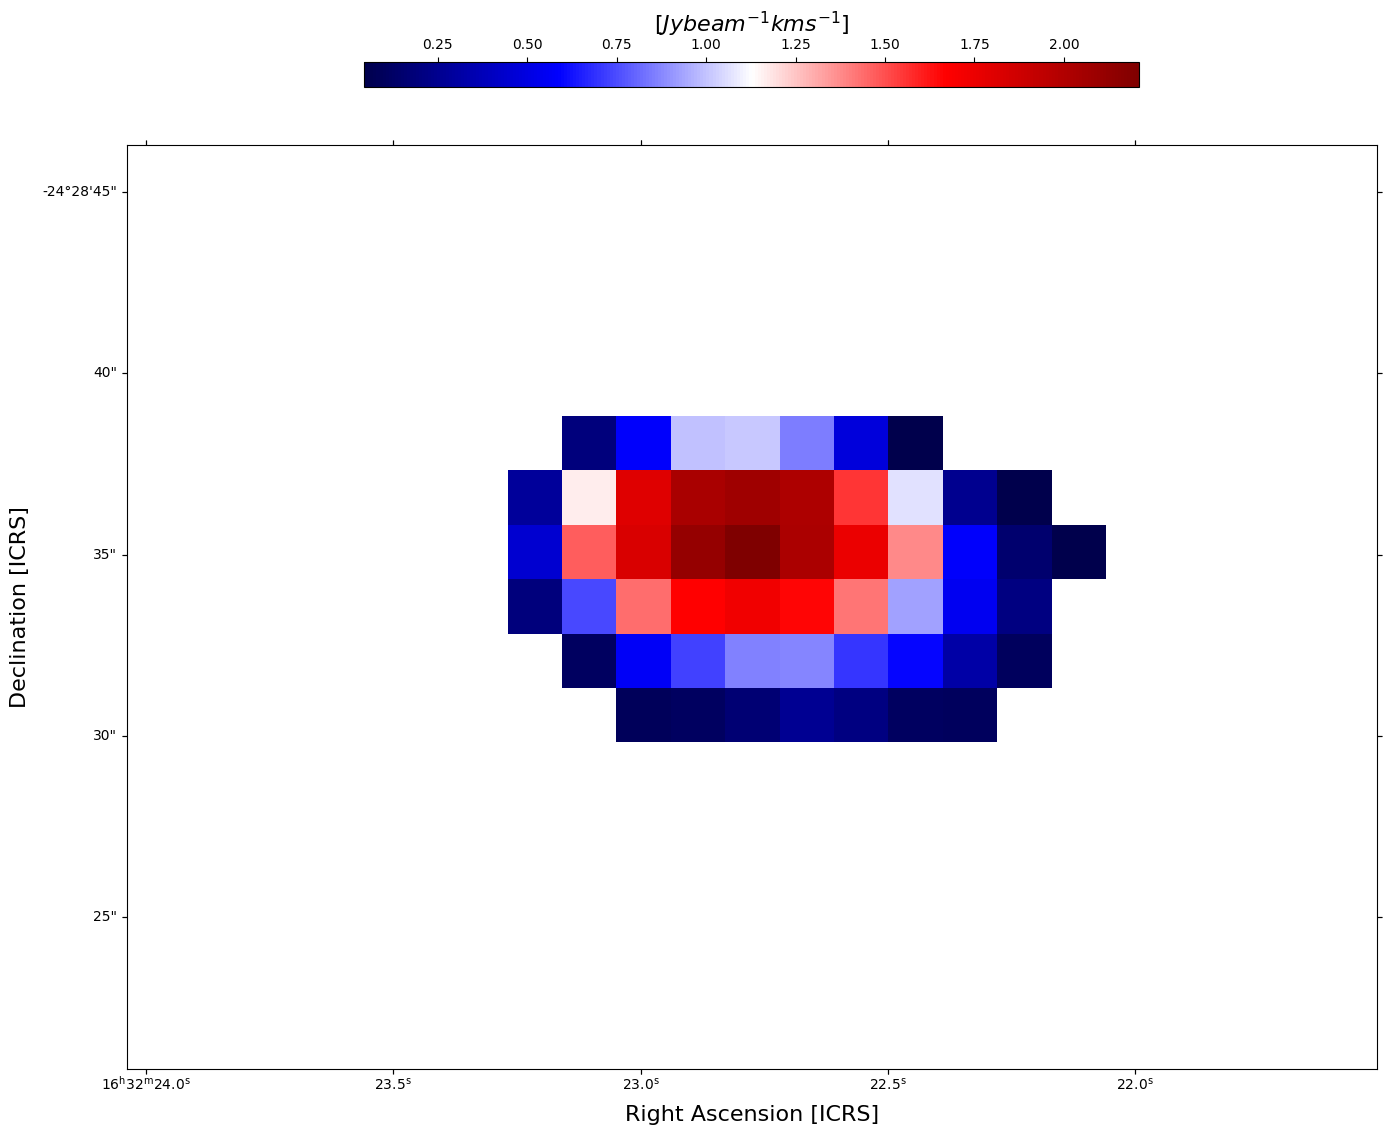

In [6]:
ra_min = '16h32m24s'  #Right Ascension lower limit
ra_max = '16h32m21.5s'  #Right Ascension upper limit

# Dec in degrees:arcminutes:arcseconds (d:m:s)
dec_min = '-24d28m45s'  #Declination lower limit
dec_max = '-24d28m20s'   #Declination upper limit

# Create SkyCoord objects for the ICRS RA/Dec limits
coord_min = SkyCoord(ra=ra_min, dec=dec_min, frame='icrs')
coord_max = SkyCoord(ra=ra_max, dec=dec_max, frame='icrs')

x_min, y_min = moment_0.wcs.world_to_pixel(coord_min)
x_max, y_max = moment_0.wcs.world_to_pixel(coord_max)

# Crop the data using the pixel limits (convert to integer for indexing)
x_min, x_max = int(x_min), int(x_max)
y_min, y_max = int(y_min), int(y_max)

# Crop the moment_0.hdu.data array to reflect the region of interest
cropped_data_0 = moment_0.hdu.data[y_min:y_max, x_min:x_max]

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection=moment_0.wcs)

im = ax.imshow(cropped_data_0, cmap='seismic', origin='lower', 
               extent=[x_min, x_max, y_min, y_max])  # extent ensures the axes correspond to the cropped area

ax.invert_yaxis()  # Ensure proper orientation

ax.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax.set_ylabel('Declination [ICRS]', fontsize=16)

# Add the colorbar based on the cropped data
cbar_im = plt.colorbar(im, ax=ax, location='top', orientation='horizontal', pad=0.05, aspect=30, shrink=0.5)
cbar_im.set_label('[$Jy beam^{-1} km s^{-1}$]', size=16)

# Moment 1 plot

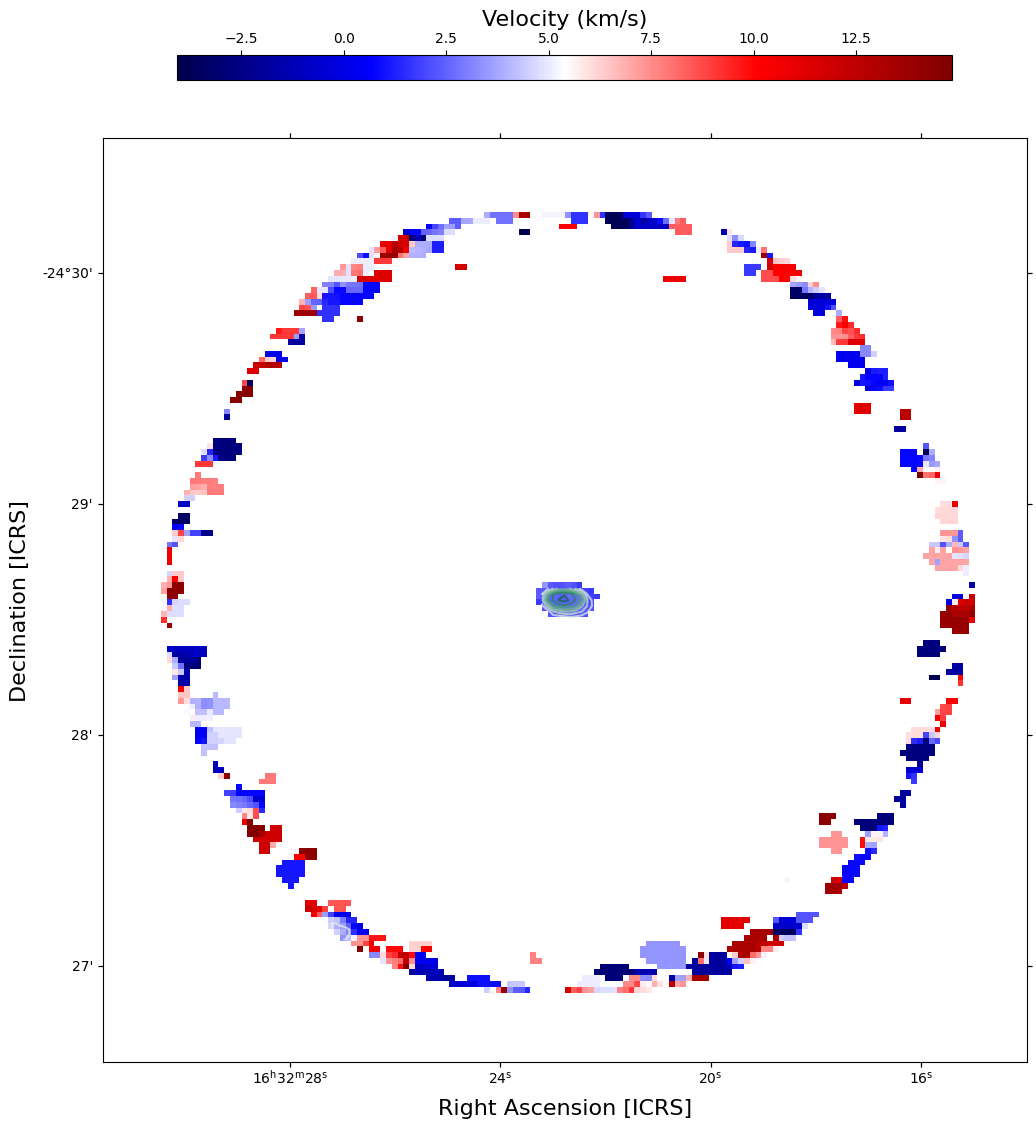

In [7]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection=moment_1.wcs)

im = ax.imshow(moment_1.hdu.data, cmap='seismic', origin='lower')
ax.invert_yaxis()  # Ensure proper orientation

ax.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax.set_ylabel('Declination [ICRS]', fontsize=16)

cbar_im = plt.colorbar(im, ax=ax, location='top', orientation='horizontal', pad=0.05, aspect=30, shrink=0.5) 
cbar_im.set_label('Velocity (km/s)', size=16)

plt.contour(moment_0.hdu.data, alpha = 0.7, cmap='Greens', origin='lower')

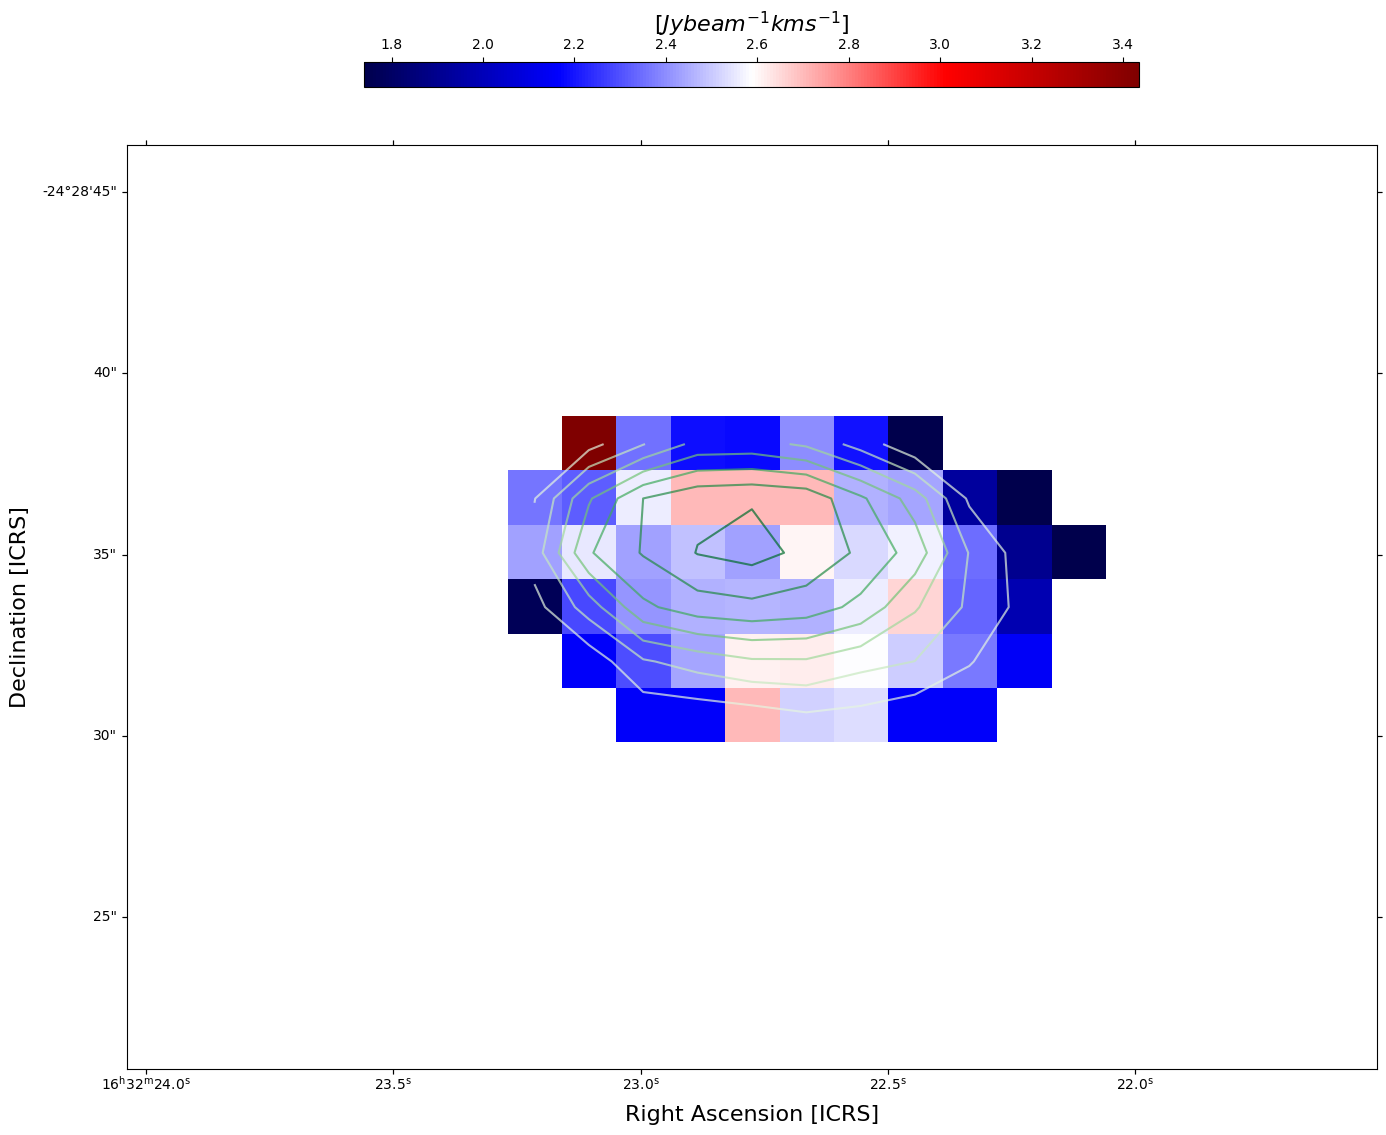

In [8]:
ra_min = '16h32m24s'  #Right Ascension lower limit
ra_max = '16h32m21.5s'  #Right Ascension upper limit

# Dec in degrees:arcminutes:arcseconds (d:m:s)
dec_min = '-24d28m45s'  #Declination lower limit
dec_max = '-24d28m20s'   #Declination upper limit

# Create SkyCoord objects for the ICRS RA/Dec limits
coord_min = SkyCoord(ra=ra_min, dec=dec_min, frame='icrs')
coord_max = SkyCoord(ra=ra_max, dec=dec_max, frame='icrs')

x_min, y_min = moment_0.wcs.world_to_pixel(coord_min)
x_max, y_max = moment_0.wcs.world_to_pixel(coord_max)

# Crop the data using the pixel limits (convert to integer for indexing)
x_min, x_max = int(x_min), int(x_max)
y_min, y_max = int(y_min), int(y_max)

# Crop the moment_0.hdu.data array to reflect the region of interest
cropped_data_1 = moment_1.hdu.data[y_min:y_max, x_min:x_max]

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection=moment_0.wcs)

im = ax.imshow(cropped_data_1, cmap='seismic', origin='lower', 
               extent=[x_min, x_max, y_min, y_max])  # extent ensures the axes correspond to the cropped area

ax.invert_yaxis()  # Ensure proper orientation

ax.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax.set_ylabel('Declination [ICRS]', fontsize=16)

# Add the colorbar based on the cropped data
cbar_im = plt.colorbar(im, ax=ax, location='top', orientation='horizontal', pad=0.05, aspect=30, shrink=0.5)
cbar_im.set_label('[$Jy beam^{-1} km s^{-1}$]', size=16)

plt.contour(cropped_data_0, alpha = 0.7, cmap='Greens', origin='lower', extent=[x_min, x_max, y_min, y_max])

# Moment 2 plot

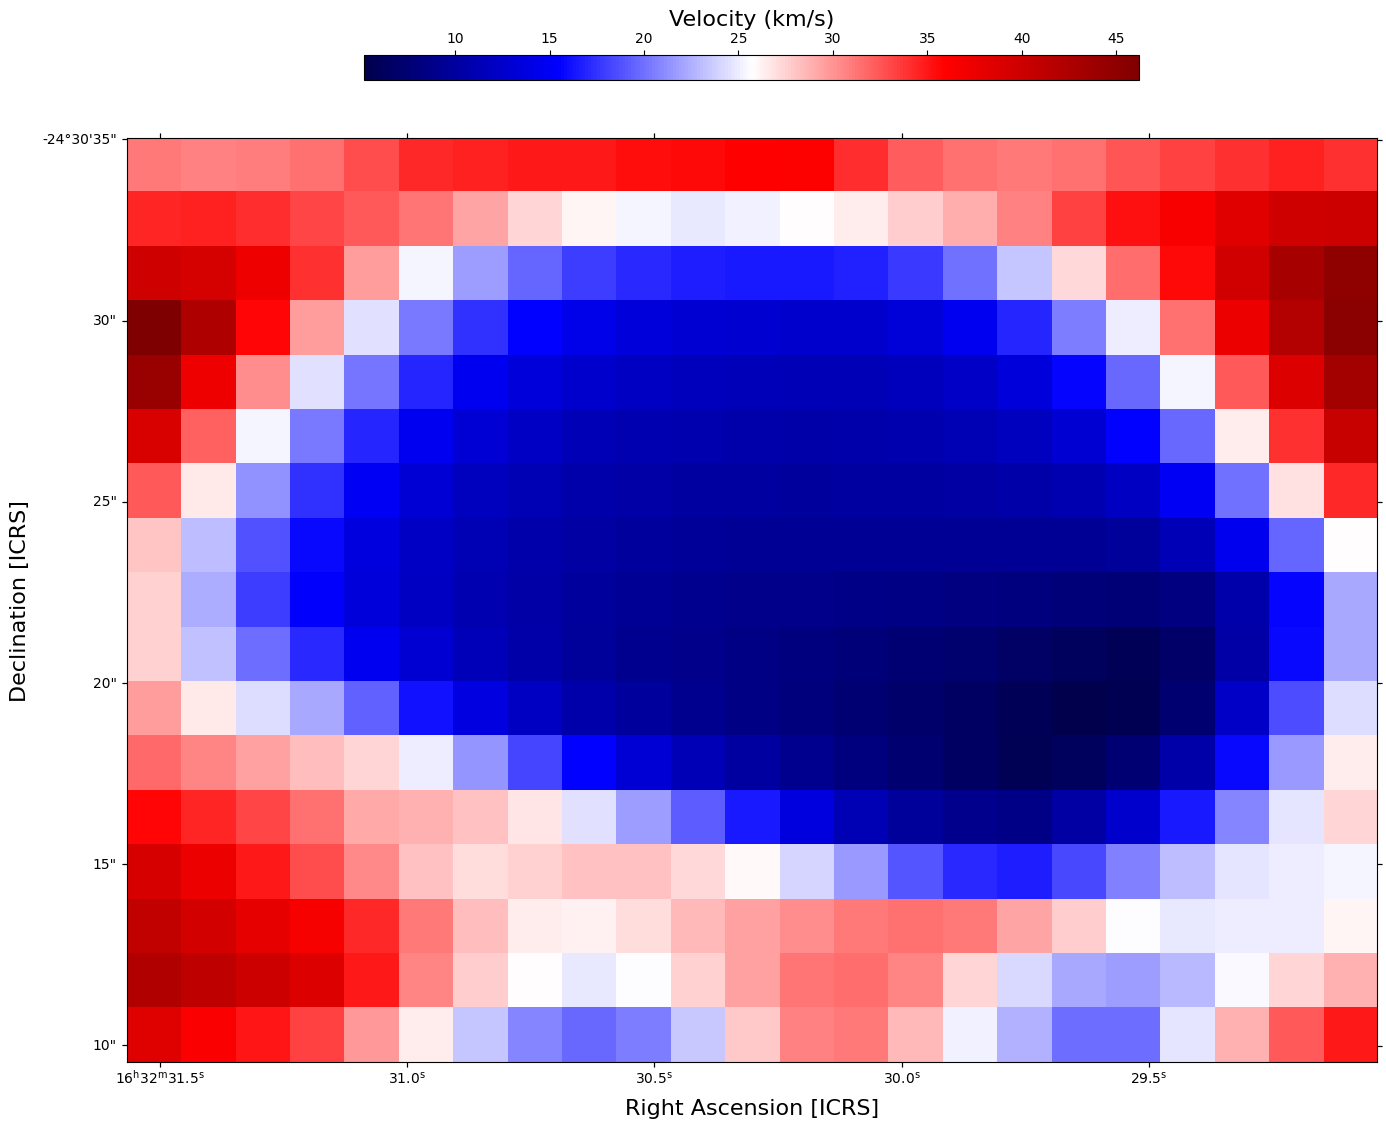

In [10]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection=moment_2.wcs)

im = ax.imshow(moment_2.hdu.data[y_min:y_max, x_min:x_max], cmap='seismic', origin='lower')
ax.invert_yaxis()  # Ensure proper orientation

ax.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax.set_ylabel('Declination [ICRS]', fontsize=16)

cbar_im = plt.colorbar(im, ax=ax, location='top', orientation='horizontal', pad=0.05, aspect=30, shrink=0.5) 
cbar_im.set_label('Velocity (km/s)', size=16)

# All together plot

NameError: name 'linewidth' is not defined

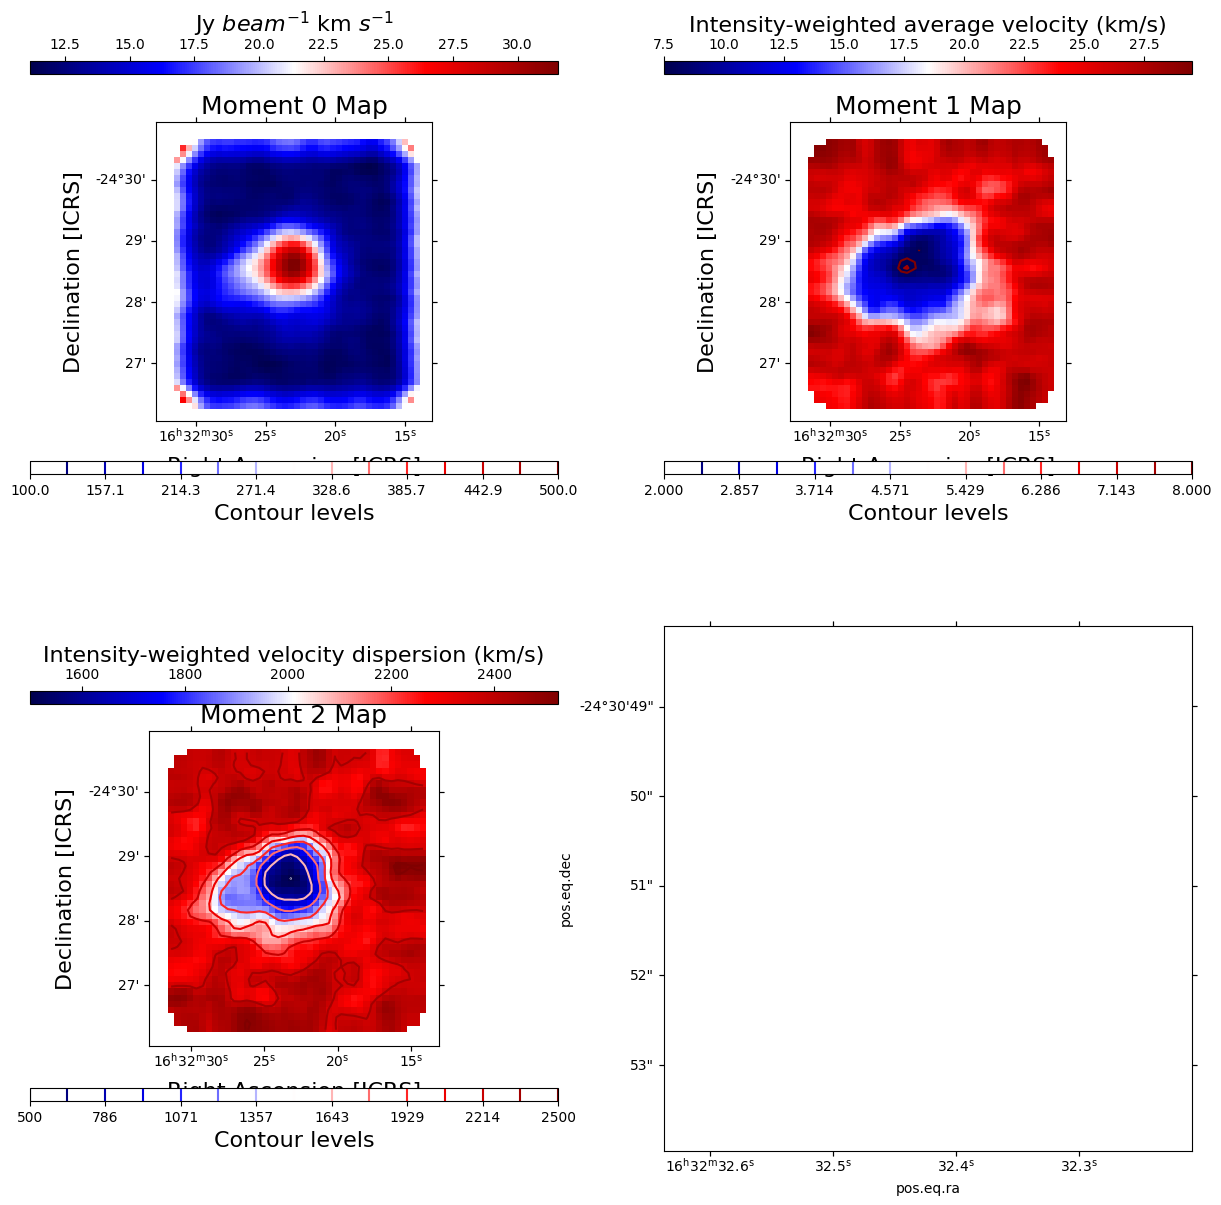

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={'projection': moment_1.wcs})  # Create a 1x2 grid of subplots

# Plot for moment 0
ax0 = axs[0,0]
im0 = ax0.imshow(moment_0.hdu.data, cmap='seismic', origin='lower')
ax0.invert_yaxis()  # Ensure proper orientation

ax0.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax0.set_ylabel('Declination [ICRS]', fontsize=16)

ax0.set_title('Moment 0 Map', fontsize=18)

cbar_im0 = plt.colorbar(im0, ax=ax0, location='top', orientation='horizontal', pad=0.09, aspect=40, shrink=1) 
cbar_im0.set_label('Jy $beam^{-1}$ km $s^{-1}$', size=16)

# Overplot contours for moment 1
levels0 = np.linspace(100, 500, 15)
contours0 = ax0.contour(moment_0.hdu.data, levels=levels0, cmap='seismic')
contour_obj0 = ax0.contour(moment_0.hdu.data, levels=levels0, colors='black', linewidths=1, alpha=0.3)
cbar_con0 = plt.colorbar(contours0, orientation='horizontal', ax=ax0, pad=0.1, aspect=40, shrink=1)
cbar_con0.set_label('Contour levels', size=16)

# Plot for moment 1
ax1 = axs[0,1]
im1 = ax1.imshow(moment_1.hdu.data, cmap='seismic', origin='lower')
ax1.invert_yaxis()  # Ensure proper orientation

ax1.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax1.set_ylabel('Declination [ICRS]', fontsize=16)

ax1.set_title('Moment 1 Map', fontsize=18)

cbar_im1 = plt.colorbar(im1, ax=ax1, location='top', orientation='horizontal', pad=0.09, aspect=40, shrink=1) 
cbar_im1.set_label('Intensity-weighted average velocity (km/s)', size=16)

# Overplot contours for moment 1
levels1 = np.linspace(2, 8, 15)
contours1 = ax1.contour(moment_1.hdu.data, levels=levels1, cmap='seismic')
# contour_obj1 = ax1.contour(moment_1.hdu.data, levels=levels1, colors='black', linewidths=1, alpha=0.3)
cbar_con1 = plt.colorbar(contours1, orientation='horizontal', ax=ax1, pad=0.1, aspect=40, shrink=1)
cbar_con1.set_label('Contour levels', size=16)

# Plot for moment 2
ax2 = axs[1,0]
im2 = ax2.imshow(moment_2.hdu.data, cmap='seismic', origin='lower')
ax2.invert_yaxis()  # Ensure proper orientation

ax2.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax2.set_ylabel('Declination [ICRS]', fontsize=16)

ax2.set_title('Moment 2 Map', fontsize=18)

cbar_im2 = plt.colorbar(im2, ax=ax2, location='top', orientation='horizontal', pad=0.05, aspect=40, shrink=1) 
cbar_im2.set_label('Intensity-weighted velocity dispersion (km/s)', size=16)

# Overplot contours for moment 2
levels2 = np.linspace(500, 2500, 15)
contours2 = ax2.contour(moment_2.hdu.data, levels=levels2, cmap='seismic')
# contour_obj2 = ax2.contour(moment_2.hdu.data, levels=levels2, colors='black', linewidths=1, alpha=0.3)
cbar_con2 = plt.colorbar(contours2, orientation='horizontal', ax=ax2, pad=0.1, aspect=40, shrink=1)
cbar_con2.set_label('Contour levels', size=16)


# Plot for fwhm
ax3 = axs[1,1]
im3 = ax3.imshow(linewidth.hdu.data, cmap='seismic', origin='lower')
ax3.invert_yaxis()  # Ensure proper orientation

ax3.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax3.set_ylabel('Declination [ICRS]', fontsize=16)

ax3.set_title('Linewidth Map', fontsize=18)

cbar_im3 = plt.colorbar(im3, ax=ax3, location='top', orientation='horizontal', pad=0.05, aspect=40, shrink=1) 
cbar_im3.set_label('Velocity (km/s)', size=16)

# Overplot contours for moment 2
levels3 = np.linspace(40, 120, 15)
contours3 = ax3.contour(linewidth.hdu.data, levels=levels3, cmap='seismic')
contour_obj3 = ax3.contour(linewidth.hdu.data, levels=levels3, colors='black', linewidths=1, alpha=0.3)
cbar_con3 = plt.colorbar(contours3, orientation='horizontal', ax=ax3, pad=0.1, aspect=40, shrink=1)
cbar_con3.set_label('Contour levels', size=16)


ax0.text(0.02, 0.98, 'Species: $CH_3OH$ \nRest Frequency: {m} GHz'.format(m=freq), 
         transform=ax0.transAxes, fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'),
         verticalalignment='top', horizontalalignment='left')

# Beam size parameters (example values)
beam_size_major_arcsec = header['BMAJ']*3600  # Major axis size in arcseconds
beam_size_minor_arcsec = header['BMIN']*3600   # Minor axis size in arcseconds
# Convert arcseconds to pixels (depends on your data; adjust accordingly)
pixels_per_arcsec = 1.0  # Replace this with the pixel scale from your WCS
beam_size_major_pixels = beam_size_major_arcsec * pixels_per_arcsec
beam_size_minor_pixels = beam_size_minor_arcsec * pixels_per_arcsec

# Create an ellipse representing the beam size
beam_ellipse_1 = patches.Ellipse((0.9, 150),  # Center position (in axis fraction)
                                beam_size_major_pixels,  # Width of ellipse
                                beam_size_minor_pixels,  # Height of ellipse
                                edgecolor='black', facecolor='none', linewidth=1, angle=0)  # Angle can be adjusted

beam_ellipse_2 = patches.Ellipse((0.9, 150),  # Center position (in axis fraction)
                                beam_size_major_pixels,  # Width of ellipse
                                beam_size_minor_pixels,  # Height of ellipse
                                edgecolor='black', facecolor='none', linewidth=1, angle=0)  # Angle can be adjusted

beam_ellipse_3 = patches.Ellipse((0.9, 150),  # Center position (in axis fraction)
                                beam_size_major_pixels,  # Width of ellipse
                                beam_size_minor_pixels,  # Height of ellipse
                                edgecolor='black', facecolor='none', linewidth=1, angle=0)  # Angle can be adjusted

beam_ellipse_4 = patches.Ellipse((0.9, 150),  # Center position (in axis fraction)
                                beam_size_major_pixels,  # Width of ellipse
                                beam_size_minor_pixels,  # Height of ellipse
                                edgecolor='black', facecolor='none', linewidth=1, angle=0)  # Angle can be adjusted


# # Add the ellipse to the axes
# ax0.add_patch(beam_ellipse_1)
# ax1.add_patch(beam_ellipse_2)
# ax2.add_patch(beam_ellipse_3)
# ax3.add_patch(beam_ellipse_4)

# ax0.plot([0.9 - beam_size_major_pixels / 2, 0.9 + beam_size_major_pixels / 2], [150, 150], color='black', linewidth=1)  # Major axis
# ax0.plot([0.9, 0.9], [150 - beam_size_minor_pixels / 2, 150 + beam_size_minor_pixels / 2], color='black', linewidth=1)  # Minor axis

# ax1.plot([0.9 - beam_size_major_pixels / 2, 0.9 + beam_size_major_pixels / 2], [150, 150], color='black', linewidth=1)  # Major axis
# ax1.plot([0.9, 0.9], [150 - beam_size_minor_pixels / 2, 150 + beam_size_minor_pixels / 2], color='black', linewidth=1)  # Minor axis

# # Add lines for major and minor axes in ax2
# ax2.plot([0.9 - beam_size_major_pixels / 2, 0.9 + beam_size_major_pixels / 2], [150, 150], color='black', linewidth=1)  # Major axis
# ax2.plot([0.9, 0.9], [150 - beam_size_minor_pixels / 2, 150 + beam_size_minor_pixels / 2], color='black', linewidth=1)  # Minor axis

# ax3.plot([0.9 - beam_size_major_pixels / 2, 0.9 + beam_size_major_pixels / 2], [150, 150], color='black', linewidth=1)  # Major axis
# ax3.plot([0.9, 0.9], [150 - beam_size_minor_pixels / 2, 150 + beam_size_minor_pixels / 2], color='black', linewidth=1)  # Minor axis


plt.tight_layout()
# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\TP\moment maps\moment_maps_ch3ohtuneb.pdf', dpi=200)

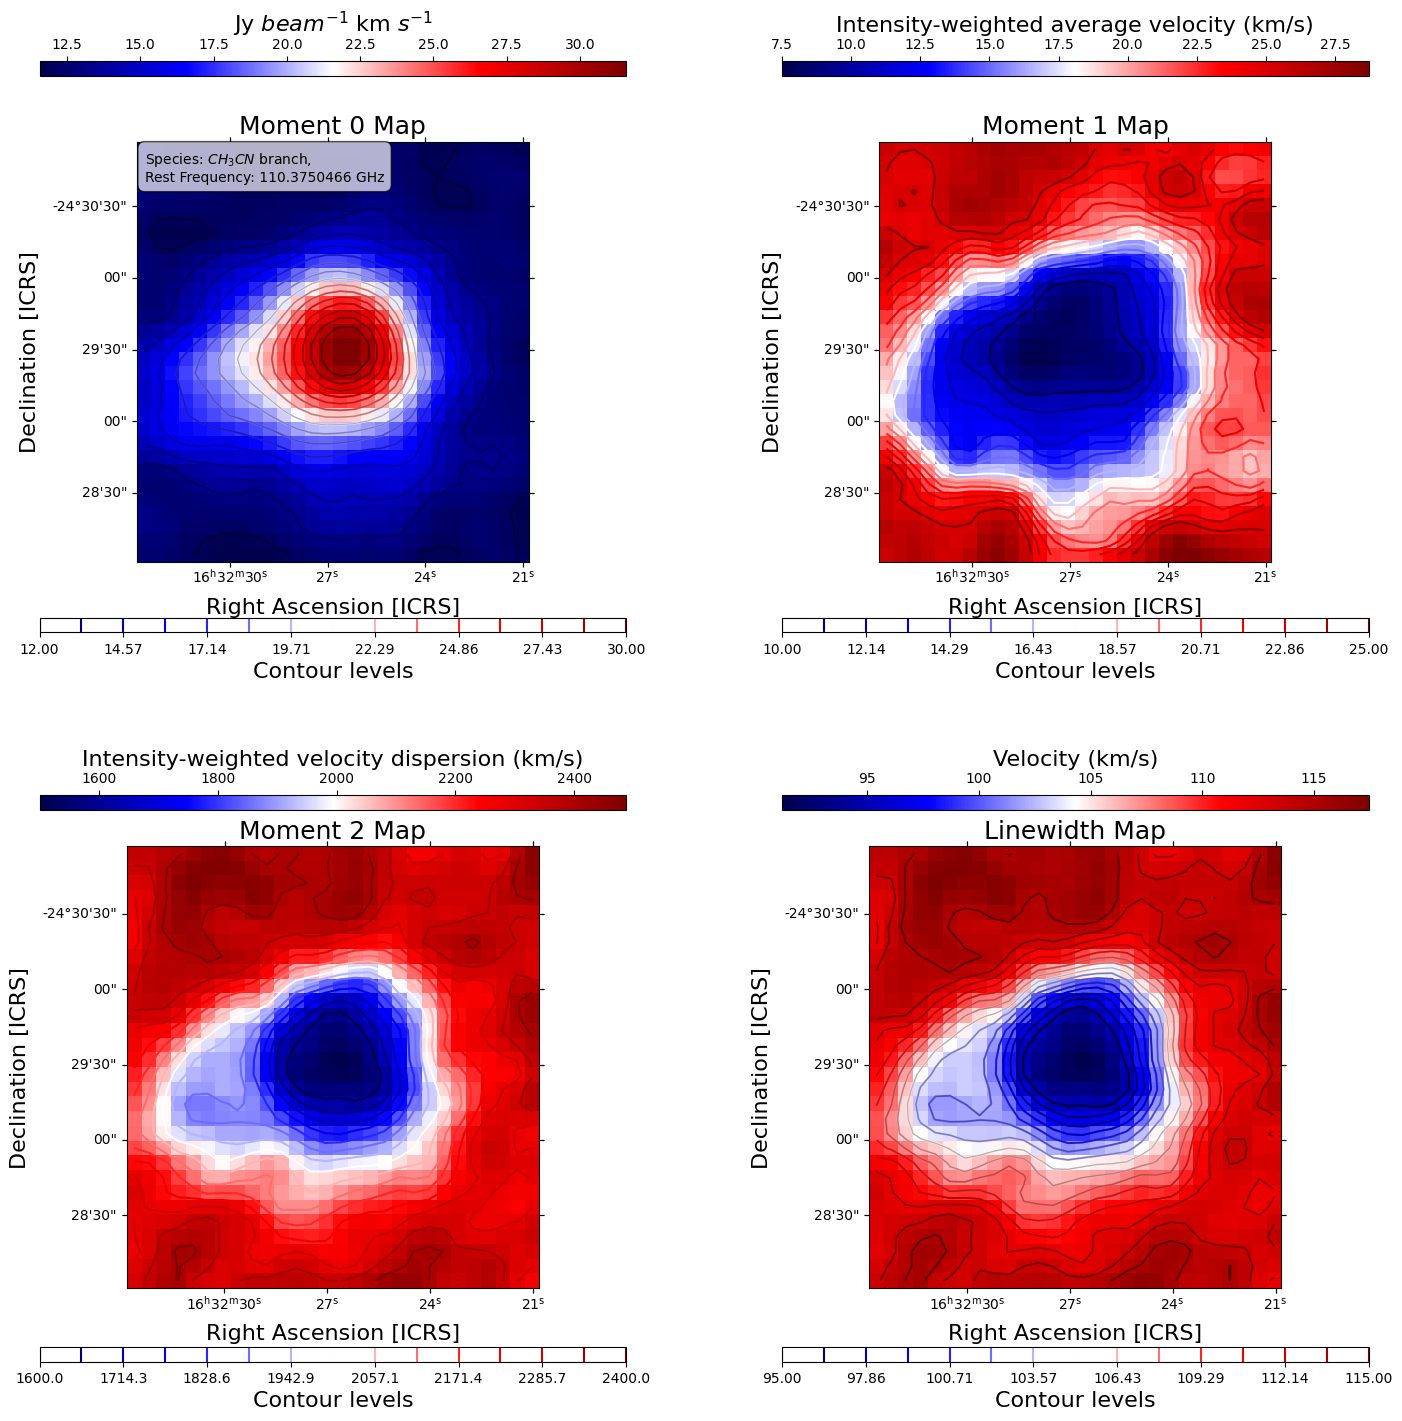

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={'projection': moment_1.wcs}) 

# Plot for moment 0
ax0 = axs[0,0]
im0 = ax0.imshow(moment_0.hdu.data[y_min:y_max, x_min:x_max], cmap='seismic', origin='lower') #* Change the vmin and vmax values to match the data
ax0.invert_yaxis()

ax0.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax0.set_ylabel('Declination [ICRS]', fontsize=16)
ax0.set_title('Moment 0 Map', fontsize=18)
cbar_im0 = plt.colorbar(im0, ax=ax0, location='top', orientation='horizontal', pad=0.09, aspect=40, shrink=1) 
cbar_im0.set_label('Jy $beam^{-1}$ km $s^{-1}$', size=16)

levels0 = np.linspace(12, 30, 15) #* Change the levels to match the data
contours0 = ax0.contour(moment_0.hdu.data[y_min:y_max, x_min:x_max], levels=levels0, cmap='seismic')
contour_obj0 = ax0.contour(moment_0.hdu.data[y_min:y_max, x_min:x_max], levels=levels0, colors='black', linewidths=1, alpha=0.3)
cbar_con0 = plt.colorbar(contours0, orientation='horizontal', ax=ax0, pad=0.1, aspect=40, shrink=1)
cbar_con0.set_label('Contour levels', size=16)

# Plot for moment 1
ax1 = axs[0,1]
im1 = ax1.imshow(moment_1.hdu.data[y_min:y_max, x_min:x_max], cmap='seismic', origin='lower') #* Change the vmin and vmax values to match the data
ax1.invert_yaxis() 

ax1.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax1.set_ylabel('Declination [ICRS]', fontsize=16)
ax1.set_title('Moment 1 Map', fontsize=18)
cbar_im1 = plt.colorbar(im1, ax=ax1, location='top', orientation='horizontal', pad=0.09, aspect=40, shrink=1) 
cbar_im1.set_label('Intensity-weighted average velocity (km/s)', size=16)

levels1 = np.linspace(10, 25, 15) #* Change the levels to match the data
contours1 = ax1.contour(moment_1.hdu.data[y_min:y_max, x_min:x_max], levels=levels1, cmap='seismic')
cbar_con1 = plt.colorbar(contours1, orientation='horizontal', ax=ax1, pad=0.1, aspect=40, shrink=1)
cbar_con1.set_label('Contour levels', size=16)

# Plot for moment 2
ax2 = axs[1,0]
im2 = ax2.imshow(moment_2.hdu.data[y_min:y_max, x_min:x_max], cmap='seismic', origin='lower') #* Change the vmin and vmax values to match the data
ax2.invert_yaxis()

ax2.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax2.set_ylabel('Declination [ICRS]', fontsize=16) 
ax2.set_title('Moment 2 Map', fontsize=18) 
cbar_im2 = plt.colorbar(im2, ax=ax2, location='top', orientation='horizontal', pad=0.05, aspect=40, shrink=1) 
cbar_im2.set_label('Intensity-weighted velocity dispersion (km/s)', size=16)

levels2 = np.linspace(1600, 2400, 15) #* Change the levels to match the data
contours2 = ax2.contour(moment_2.hdu.data[y_min:y_max, x_min:x_max], levels=levels2, cmap='seismic')
cbar_con2 = plt.colorbar(contours2, orientation='horizontal', ax=ax2, pad=0.1, aspect=40, shrink=1)
cbar_con2.set_label('Contour levels', size=16)


# Plot for fwhm
ax3 = axs[1,1]
im3 = ax3.imshow(linewidth_map.hdu.data[y_min:y_max, x_min:x_max], cmap='seismic', origin='lower') #* Change the vmin and vmax values to match the data
ax3.invert_yaxis()

ax3.set_xlabel('Right Ascension [ICRS]', fontsize=16)
ax3.set_ylabel('Declination [ICRS]', fontsize=16)
ax3.set_title('Linewidth Map', fontsize=18)
cbar_im3 = plt.colorbar(im3, ax=ax3, location='top', orientation='horizontal', pad=0.05, aspect=40, shrink=1) 
cbar_im3.set_label('Velocity (km/s)', size=16)

levels3 = np.linspace(95, 115, 15) #* Change the levels to match the data
contours3 = ax3.contour(linewidth_map.hdu.data[y_min:y_max, x_min:x_max], levels=levels3, cmap='seismic')
contour_obj3 = ax3.contour(linewidth_map.hdu.data[y_min:y_max, x_min:x_max], levels=levels3, colors='black', linewidths=1, alpha=0.3)
cbar_con3 = plt.colorbar(contours3, orientation='horizontal', ax=ax3, pad=0.1, aspect=40, shrink=1)
cbar_con3.set_label('Contour levels', size=16)


ax0.text(0.02, 0.98, 
         'Species: {},\nRest Frequency: {} GHz'.format(species, freq),
         transform=ax0.transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'),
         verticalalignment='top', 
         horizontalalignment='left')


beam_ellipse = func.beam_ellipse(data, 0.9, 150)
major = func.major_axis(data, 0.9)
minor = func.minor_axis(data, 150)

# ax0.add_patch(beam_ellipse)
# ax1.add_patch(beam_ellipse)
# ax2.add_patch(beam_ellipse)
# ax3.add_patch(beam_ellipse)

# ax0.plot(major, [150, 150], color='black', linewidth=1)  # Major axis
# ax0.plot([0.9, 0.9], minor, color='black', linewidth=1)  # Minor axis

# ax1.plot(major, [150, 150], color='black', linewidth=1)  # Major axis
# ax1.plot([0.9, 0.9], minor, color='black', linewidth=1)  # Minor axis

# ax2.plot(major, [150, 150], color='black', linewidth=1)  # Major axis
# ax2.plot([0.9, 0.9], minor, color='black', linewidth=1)  # Minor axis

# ax3.plot(major, [150, 150], color='black', linewidth=1)  # Major axis
# ax3.plot([0.9, 0.9], minor, color='black', linewidth=1)  # Minor axis

plt.tight_layout()
# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\TP\moment maps\moment_maps_ch3cn branch_cropped.pdf', dpi=200)

TypeError: Invalid shape (1018,) for image data

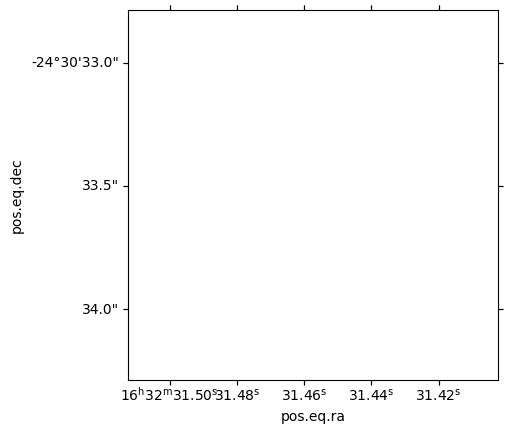

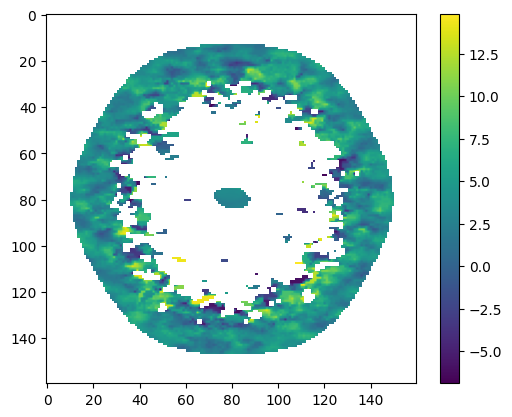

In [330]:
cube = SpectralCube.read(data)
slab = cube.spectral_slab(fmin * u.GHz, fmax * u.GHz)
rest = 110.3494794 * u.GHz
lower_bound = 0.1 * u.Jy / u.beam 
upper_bound = 0.8 * u.Jy / u.beam  
mask_bounds = (slab >= lower_bound) & (slab <= upper_bound)
cube_masked = slab.with_mask(mask_bounds)
cube_with_velocity = cube_masked.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=rest)
moment_map = cube_with_velocity.with_spectral_unit(u.km/u.s).moment(order=1)

plt.imshow(moment_map.hdu.data)
plt.colorbar()